In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

from bounds import *
from dgp import *
from vset import *
import estimation, utils, experiments, vset, plots
import pandas as pd



# Debugging IV identification

In [3]:
Dx, Du = 5, 0
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 2
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)


## Test learning outcome probabilities

In [3]:
msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='oracle', K=5)

,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.442321,0.205203,-0.299383,0.046694,1,1,-0.044788,m_y=1,MSM,oracle
1,-0.453623,0.184842,-0.314613,0.024438,1,1,-0.303794,m_y=0,MSM,oracle
2,-0.621289,0.505295,-0.244548,0.128554,1,1,0.122409,m_a=0,MSM,oracle
3,-0.110657,0.269244,-0.110657,0.269244,1,1,0.124838,m_a=1,MSM,oracle
4,-0.367146,0.388546,-0.122113,0.143513,1,1,0.092100,m_u,MSM,oracle


In [84]:
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)

outcome regression error: 0.043218950581498154
propensitiy error: 0.026068173306555392
outcome regression error: 0.03883126286322675
propensitiy error: 0.025846728054586564
outcome regression error: 0.04162230822009172
propensitiy error: 0.024802039095536528
outcome regression error: 0.039635756080474094
propensitiy error: 0.02578407892389513
outcome regression error: 0.03992138284299188
propensitiy error: 0.025476313405033636


,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.545193,-0.338356,-0.508254,-0.377225,1.0,1.0,-0.449353,m_y=1,MSM,plugin
1,-0.550948,-0.342820,-0.514499,-0.381328,1.0,1.0,-0.458090,m_y=0,MSM,plugin
2,-0.280651,0.218070,-0.195899,0.133319,1.0,1.0,0.001760,m_a=0,MSM,plugin
3,-0.027843,0.057846,-0.027843,0.057846,1.0,1.0,0.007186,m_a=1,MSM,plugin
4,-0.084671,0.085471,-0.028803,0.029603,1.0,1.0,0.002100,m_u,MSM,plugin


# Coverage sample size experiment 
- Construct 95% bootstrap CI around plug-in estimates of the regret. Plot as a function of sample size.
- Also plot coverage as a function of sample size.

In [6]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5
}

msm_dgp = set_dgp_config(dgp, 'MSM')
Ns = [100, 300, 600, 900, 1200, 1500, msm_dgp['N']-1]
coveragedf = experiments.estimation_coverage_experiment(msm_dgp, Ns, Nsims=30)



outcome regression error: 0.21890783405077174
propensitiy error: 0.2433494957697811
outcome regression error: 0.26349347146033036
propensitiy error: 0.20004202818814792
outcome regression error: 0.25293580698563994
propensitiy error: 0.3201279706116701
outcome regression error: 0.1902054877614868
propensitiy error: 0.15185481970684767
outcome regression error: 0.31150552113006374
propensitiy error: 0.23411820137593842
outcome regression error: 0.16307360349676242
propensitiy error: 0.24322472729159447
outcome regression error: 0.236668970343203
propensitiy error: 0.26249204223061195
outcome regression error: 0.05572194397648846
propensitiy error: 0.21479578449268316
outcome regression error: 0.08037443554204461
propensitiy error: 0.20007815054348507
outcome regression error: 0.15561517191386803
propensitiy error: 0.2004237799724212
outcome regression error: 0.12634658790256909
propensitiy error: 0.19983625626557872
outcome regression error: 0.15816556095342257
propensitiy error: 0.1964

outcome regression error: 0.1810721673530049
propensitiy error: 0.1731475068900788
outcome regression error: 0.20646528115912427
propensitiy error: 0.13325446496837418
outcome regression error: 0.1482776074997508
propensitiy error: 0.22183250270468538
outcome regression error: 0.0938202024608347
propensitiy error: 0.18773771615759438
outcome regression error: 0.13768322602758562
propensitiy error: 0.10835016327087273
outcome regression error: 0.1508815670743668
propensitiy error: 0.23372489039470698
outcome regression error: 0.1225577601551697
propensitiy error: 0.17606734635863985
outcome regression error: 0.1262401212584261
propensitiy error: 0.21495993535986962
outcome regression error: 0.11545655320957364
propensitiy error: 0.24131734970174262
outcome regression error: 0.17474396133267575
propensitiy error: 0.1710920332284809
outcome regression error: 0.1461958618219989
propensitiy error: 0.23641903325715172
outcome regression error: 0.10449247133018887
propensitiy error: 0.2819341

outcome regression error: 0.09192491754977539
propensitiy error: 0.1616123725565979
outcome regression error: 0.10221754201094232
propensitiy error: 0.17765166039076782
outcome regression error: 0.11838414742601974
propensitiy error: 0.18704927015493714
outcome regression error: 0.13120215253612655
propensitiy error: 0.20849972194306193
outcome regression error: 0.1235794645452418
propensitiy error: 0.16924599999732334
outcome regression error: 0.11698140875923621
propensitiy error: 0.2447384753424889
outcome regression error: 0.1351202724955938
propensitiy error: 0.20160419123898754
outcome regression error: 0.11370834048977359
propensitiy error: 0.1951084379194695
outcome regression error: 0.15294587660732142
propensitiy error: 0.17300606015992015
outcome regression error: 0.12196534779251059
propensitiy error: 0.17675377683343785
outcome regression error: 0.095956512262996
propensitiy error: 0.17052828879098014
outcome regression error: 0.10676347683961833
propensitiy error: 0.19096

outcome regression error: 0.10417099363400825
propensitiy error: 0.16561595290551015
outcome regression error: 0.09996546049608844
propensitiy error: 0.18278790509220552
outcome regression error: 0.11139824702523425
propensitiy error: 0.18305730860971678
outcome regression error: 0.11508477247976273
propensitiy error: 0.17646116210193655
outcome regression error: 0.0922136611296016
propensitiy error: 0.19365736846716547
outcome regression error: 0.08442676255198359
propensitiy error: 0.18489239470097044
outcome regression error: 0.09245836612524587
propensitiy error: 0.21582689357939577
outcome regression error: 0.08751313205087621
propensitiy error: 0.19511307866079933
outcome regression error: 0.10786900870838449
propensitiy error: 0.1817230322121827
outcome regression error: 0.08735627796482687
propensitiy error: 0.2010450535192202
outcome regression error: 0.12680090020245113
propensitiy error: 0.17664176314750826
outcome regression error: 0.07758112501996692
propensitiy error: 0.1

outcome regression error: 0.10149526928028434
propensitiy error: 0.17490668475141327
outcome regression error: 0.11643982869579193
propensitiy error: 0.1987405867230091
outcome regression error: 0.0996518079464652
propensitiy error: 0.17033643840483348
outcome regression error: 0.09022675475059865
propensitiy error: 0.2035712894681595
outcome regression error: 0.09043444263120039
propensitiy error: 0.19079321757623222
outcome regression error: 0.1073676868492966
propensitiy error: 0.1611782438246202
outcome regression error: 0.09230199189637775
propensitiy error: 0.16314608909027176
outcome regression error: 0.09481944009025879
propensitiy error: 0.19173819260518948
outcome regression error: 0.10478406524592333
propensitiy error: 0.1809675885252948
outcome regression error: 0.12284957498407996
propensitiy error: 0.1770292754810926
outcome regression error: 0.09246377916480243
propensitiy error: 0.193147386500435
outcome regression error: 0.09718523681344804
propensitiy error: 0.1707258

outcome regression error: 0.08115989736802971
propensitiy error: 0.18215199916437205
outcome regression error: 0.09841376016465479
propensitiy error: 0.182610787858505
outcome regression error: 0.10473498190195174
propensitiy error: 0.1666543980737136
outcome regression error: 0.11586806268398991
propensitiy error: 0.18514068698172115
outcome regression error: 0.09898244686365512
propensitiy error: 0.19598744364761178
outcome regression error: 0.09732594212260434
propensitiy error: 0.19235512977323105
outcome regression error: 0.1002009705324852
propensitiy error: 0.16915174995854323
outcome regression error: 0.09732517276170645
propensitiy error: 0.2053752419737362
outcome regression error: 0.1006471859623863
propensitiy error: 0.1843265983706165
outcome regression error: 0.12749862198929204
propensitiy error: 0.18716975629051688
outcome regression error: 0.10306525129700171
propensitiy error: 0.19037123072305956
outcome regression error: 0.10823356195915418
propensitiy error: 0.17861

outcome regression error: 0.08832534364927286
propensitiy error: 0.18130071419821933
outcome regression error: 0.09534291229963522
propensitiy error: 0.16187484784219855
outcome regression error: 0.10259788661996444
propensitiy error: 0.1883292285697485
outcome regression error: 0.10472504676118674
propensitiy error: 0.17804297140443637
outcome regression error: 0.10741299102982522
propensitiy error: 0.17761617176143543
outcome regression error: 0.10253606919789551
propensitiy error: 0.16568132932492668
outcome regression error: 0.0965867329767524
propensitiy error: 0.19136624436958663
outcome regression error: 0.09244694778633808
propensitiy error: 0.1941472921433699
outcome regression error: 0.08612099114218189
propensitiy error: 0.19619009952964855
outcome regression error: 0.08793370860023424
propensitiy error: 0.1923412859525069
outcome regression error: 0.09095279525239501
propensitiy error: 0.20288141789762512
outcome regression error: 0.08640941420664906
propensitiy error: 0.17

outcome regression error: 0.08705222783149962
propensitiy error: 0.1738749759937748
outcome regression error: 0.08436407726269346
propensitiy error: 0.17574335718924222
outcome regression error: 0.09730601778011008
propensitiy error: 0.1655604323816613
outcome regression error: 0.08601359028840347
propensitiy error: 0.1977263960628136
outcome regression error: 0.10256527207407255
propensitiy error: 0.17723580581282886
outcome regression error: 0.1005013607823356
propensitiy error: 0.18177224828642569
outcome regression error: 0.09236946193311178
propensitiy error: 0.19414356127477211
outcome regression error: 0.10811693562213458
propensitiy error: 0.19794845805462485
outcome regression error: 0.08723299234425853
propensitiy error: 0.17229712812772888
outcome regression error: 0.08518149569683645
propensitiy error: 0.1716402280053801
outcome regression error: 0.0944664138667308
propensitiy error: 0.18151942253810247
outcome regression error: 0.1157619230548236
propensitiy error: 0.18263

outcome regression error: 0.09080725382941124
propensitiy error: 0.18727054063455198
outcome regression error: 0.09323201752581682
propensitiy error: 0.1739739450861852
outcome regression error: 0.08733654554178884
propensitiy error: 0.17655385696912496
outcome regression error: 0.09046021994960503
propensitiy error: 0.1697505664173343
outcome regression error: 0.09857433187563065
propensitiy error: 0.1851145818257029
outcome regression error: 0.09157845950247387
propensitiy error: 0.17648143187487605
outcome regression error: 0.09813623935734031
propensitiy error: 0.16469926889596073
outcome regression error: 0.0956074294548006
propensitiy error: 0.1707641305210044
outcome regression error: 0.09591873948065938
propensitiy error: 0.17611083906679556
outcome regression error: 0.09717292286712331
propensitiy error: 0.18422611632311917
outcome regression error: 0.09177467144055233
propensitiy error: 0.17753568163772343
outcome regression error: 0.11063370393771578
propensitiy error: 0.175

outcome regression error: 0.08944691503501431
propensitiy error: 0.17858084754745146
outcome regression error: 0.08569803349284853
propensitiy error: 0.18065082244620356
outcome regression error: 0.08533776041827179
propensitiy error: 0.18423640482195627
outcome regression error: 0.08625994968929386
propensitiy error: 0.17651029877314173
outcome regression error: 0.08686175671957662
propensitiy error: 0.18057010061642945
outcome regression error: 0.08673479630196798
propensitiy error: 0.17984585555079982
outcome regression error: 0.08984837057311648
propensitiy error: 0.18179002824975218
outcome regression error: 0.08770221707691889
propensitiy error: 0.18315862027530516
outcome regression error: 0.08394342409157249
propensitiy error: 0.17629086892333407
outcome regression error: 0.08524395558537932
propensitiy error: 0.18012303332433416
outcome regression error: 0.08666317928414119
propensitiy error: 0.18061826233807265
outcome regression error: 0.08718626091488736
propensitiy error: 

outcome regression error: 0.0806106134585298
propensitiy error: 0.17914599979722634
outcome regression error: 0.08743463832599604
propensitiy error: 0.1795470643749501
outcome regression error: 0.09071798790676637
propensitiy error: 0.17565589418131652
outcome regression error: 0.08498726896635796
propensitiy error: 0.18042819406139188
outcome regression error: 0.0870032948752468
propensitiy error: 0.1793013050122077
outcome regression error: 0.08895526038774462
propensitiy error: 0.182130221132682
outcome regression error: 0.08445875730107033
propensitiy error: 0.17773200094260722
outcome regression error: 0.08709945551111835
propensitiy error: 0.18076322718178606
outcome regression error: 0.09040085287627704
propensitiy error: 0.18227102130016568
outcome regression error: 0.0860187669048017
propensitiy error: 0.18061867076708646
outcome regression error: 0.08448772010368628
propensitiy error: 0.17600414625592253
outcome regression error: 0.08824547869410887
propensitiy error: 0.18405

Text(0, 0.5, 'Accuracy regret')

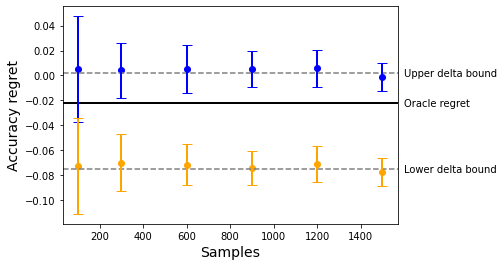

In [7]:
ns_data = experiments.get_est_exp_metadata(coveragedf, Ns)
ns_data = ns_data[ns_data['metric'] == 'm_u']

oracle_up = ns_data['Rd_up_oracle'].tolist()[-1]
oracle_down = ns_data['Rd_down_oracle'].tolist()[-1]
oracle = ns_data['R_oracle'].tolist()[-1]
ns_data = ns_data.iloc[:-1,:]

plt.axhline(oracle_up, color='grey', linestyle='--')
plt.axhline(oracle_down, color='grey', linestyle='--')
plt.axhline(oracle, color='k', linewidth=2,label='$R^*$')

plt.scatter(ns_data['N'], ns_data['Rd_up_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    plt.errorbar(n, ns_data['Rd_up_pl_mean'].tolist()[ix], yerr=ns_data['Rd_up_pl_ci'].tolist()[ix],capsize=5, linewidth=2, elinewidth=2, color='blue')

plt.scatter(ns_data['N'], ns_data['Rd_down_pl_mean'], color='orange')
for ix,n in enumerate(ns_data['N']):
    plt.errorbar(n, ns_data['Rd_down_pl_mean'].tolist()[ix], yerr=ns_data['Rd_down_pl_ci'].tolist()[ix],capsize=5, linewidth=2, elinewidth=2, color='orange')
    
# Determine the X location for the text boxes (adjust as needed)
x_loc = max(ns_data['N']) + 100  # Adjust the offset (10 here) as needed

# Add text boxes
plt.text(x_loc, oracle_up, 'Upper delta bound', va='center')
plt.text(x_loc, oracle_down, r'Lower delta bound', va='center', clip_on=False)
plt.text(x_loc, oracle, 'Oracle regret', va='center')

plt.xlabel('Samples', fontsize=14)
plt.ylabel('Accuracy regret', fontsize=14)

Text(0, 0.5, 'Coverage (%)')

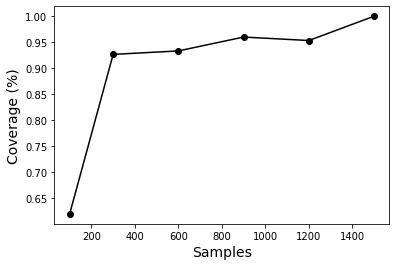

In [8]:
samples = coveragedf[(coveragedf['est_method'] == 'plugin') & (coveragedf['metric'] == 'm_u')]
coverage = samples.groupby('N').mean()['Rd_coverage'].tolist()[:-1]
N = samples.groupby('N').mean().reset_index()['N'].tolist()[:-1]

plt.plot(N, coverage, marker='o', color='k')
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Coverage (%)', fontsize=14)

# Design sensitivity experiment 
- Delta bounds enable certifying a policy improvement up to a larger magnitude of confounding

In [9]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.1
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)

In [ ]:
lambdas = np.arange(1, 2.6, .1)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)

outcome regression error: 0.16021434499445047
propensitiy error: 0.1805003502468488
outcome regression error: 0.16279513285458097
propensitiy error: 0.1803587983511516
outcome regression error: 0.16045295905790433
propensitiy error: 0.17954785001188833
outcome regression error: 0.16126722202002278
propensitiy error: 0.18068244179148818
outcome regression error: 0.15675682891084491
propensitiy error: 0.1765990937981823
outcome regression error: 0.16324051735704234
propensitiy error: 0.18092213726108072
outcome regression error: 0.15858693234533286
propensitiy error: 0.178515090579016
outcome regression error: 0.1584484435888744
propensitiy error: 0.17987252033457288
outcome regression error: 0.1625007107140135
propensitiy error: 0.1778991271121868
outcome regression error: 0.1594546526769725
propensitiy error: 0.17960669546146715
outcome regression error: 0.15801775544677604
propensitiy error: 0.17541233546748
outcome regression error: 0.16225631833587392
propensitiy error: 0.1796098715

# Experiment: Exclusion restriction violation tests

outcome regression error: 0.17417286038894012
propensitiy error: 0.07758561400948469
outcome regression error: 0.1787991601043579
propensitiy error: 0.07739301358977238
outcome regression error: 0.17174408648578962
propensitiy error: 0.07668889797721981
outcome regression error: 0.17317751284066438
propensitiy error: 0.07320722728611344
outcome regression error: 0.17536836123633573
propensitiy error: 0.07348870623002979
outcome regression error: 0.17663962288458473
propensitiy error: 0.07990772087341814
outcome regression error: 0.17075430455096174
propensitiy error: 0.07974062043783013
outcome regression error: 0.17516463265867754
propensitiy error: 0.07671709769426129
outcome regression error: 0.17550526109039202
propensitiy error: 0.07949370862257657
outcome regression error: 0.17613876605739648
propensitiy error: 0.0791259398925403
outcome regression error: 0.17614434020799552
propensitiy error: 0.08055815737450309
outcome regression error: 0.17838735580062898
propensitiy error: 0.

outcome regression error: 0.17663587137259054
propensitiy error: 0.08005972500274404
outcome regression error: 0.17871639382941748
propensitiy error: 0.07679905601918637
outcome regression error: 0.17870728581094447
propensitiy error: 0.07771344369239566
outcome regression error: 0.18049554455332284
propensitiy error: 0.07604361343798835
outcome regression error: 0.18142511991152488
propensitiy error: 0.07796155070978068
outcome regression error: 0.1789269165476756
propensitiy error: 0.07700315445658544
outcome regression error: 0.17759431694438374
propensitiy error: 0.07450382641909917
outcome regression error: 0.17673296176694772
propensitiy error: 0.07331900138180342
outcome regression error: 0.17706808987322278
propensitiy error: 0.07560050036612258
outcome regression error: 0.17625086066344245
propensitiy error: 0.07269457147754389
outcome regression error: 0.17532902921660282
propensitiy error: 0.07064301314350696
outcome regression error: 0.17242956580593993
propensitiy error: 0

outcome regression error: 0.18063253360642306
propensitiy error: 0.07120817971254545
outcome regression error: 0.17941502102584975
propensitiy error: 0.07481939149911984
outcome regression error: 0.18113684224001822
propensitiy error: 0.0740467724197502
outcome regression error: 0.1738909545547947
propensitiy error: 0.07464292112317994
outcome regression error: 0.18103381443730587
propensitiy error: 0.07257417483213617
outcome regression error: 0.17452529034802905
propensitiy error: 0.06760360699570414
outcome regression error: 0.17358191056733457
propensitiy error: 0.06614060974307082
outcome regression error: 0.172170435595482
propensitiy error: 0.07408319658281835
outcome regression error: 0.17519147518276174
propensitiy error: 0.07148004729225943
outcome regression error: 0.17043658829825908
propensitiy error: 0.07593973624498603
outcome regression error: 0.1743566794569872
propensitiy error: 0.06994808849342336
outcome regression error: 0.17440196037809347
propensitiy error: 0.070

outcome regression error: 0.17308563076620648
propensitiy error: 0.07053513698543486
outcome regression error: 0.1728334751817186
propensitiy error: 0.06718435539631312
outcome regression error: 0.17482458580612836
propensitiy error: 0.06991720299535115
outcome regression error: 0.17438447726888
propensitiy error: 0.06931560607004954
outcome regression error: 0.17903987267734492
propensitiy error: 0.07019085974670565
outcome regression error: 0.17424647877032612
propensitiy error: 0.07579538272674644
outcome regression error: 0.17067050406365142
propensitiy error: 0.07199516704290221
outcome regression error: 0.1808036801820685
propensitiy error: 0.0749044960944447
outcome regression error: 0.16963227693410346
propensitiy error: 0.0746605519601726
outcome regression error: 0.17175082894971688
propensitiy error: 0.07233902686192616
outcome regression error: 0.1786662536584918
propensitiy error: 0.0785360576402362
outcome regression error: 0.18728152681554947
propensitiy error: 0.0785645

outcome regression error: 0.17783037978780034
propensitiy error: 0.08454646262903841
outcome regression error: 0.17913032070099982
propensitiy error: 0.08695486303990817
outcome regression error: 0.17301474947204623
propensitiy error: 0.08707109588971167
outcome regression error: 0.16837586560527534
propensitiy error: 0.08394729820014783
outcome regression error: 0.1722438887354128
propensitiy error: 0.08372694198638919
outcome regression error: 0.17852822447438
propensitiy error: 0.0841939739687221
outcome regression error: 0.1795273790004873
propensitiy error: 0.08653595001713497
outcome regression error: 0.17798374896804564
propensitiy error: 0.08373480498742186
outcome regression error: 0.17513927047915337
propensitiy error: 0.08264970330416452
outcome regression error: 0.17582051802927703
propensitiy error: 0.08340339914998651
outcome regression error: 0.1698515944130707
propensitiy error: 0.06811354579363763
outcome regression error: 0.1743421421530651
propensitiy error: 0.071336

outcome regression error: 0.16459444882932098
propensitiy error: 0.07329758337507607
outcome regression error: 0.1671357175023362
propensitiy error: 0.0677407431457886
outcome regression error: 0.16705569503725096
propensitiy error: 0.0726785887414023
outcome regression error: 0.1712530819472787
propensitiy error: 0.07347417023646749
outcome regression error: 0.16251782549493746
propensitiy error: 0.07200091747743993
outcome regression error: 0.16790513439038482
propensitiy error: 0.0786092605637495
outcome regression error: 0.16975551829269447
propensitiy error: 0.08213584407667307
outcome regression error: 0.17106650023770067
propensitiy error: 0.07839898842582926
outcome regression error: 0.1694706867503548
propensitiy error: 0.07948673536247722
outcome regression error: 0.17369189359282367
propensitiy error: 0.08319577427931547
outcome regression error: 0.1709523747220657
propensitiy error: 0.07544414661876217
outcome regression error: 0.17545316153900367
propensitiy error: 0.07506

outcome regression error: 0.17263196636107847
propensitiy error: 0.06977597124748898
outcome regression error: 0.17068379071901177
propensitiy error: 0.07440337085247338
outcome regression error: 0.17091309514043046
propensitiy error: 0.07250867012439186
outcome regression error: 0.16507323487702724
propensitiy error: 0.07155855755546854
outcome regression error: 0.16879651024025105
propensitiy error: 0.07013392195754564
outcome regression error: 0.16691874414733285
propensitiy error: 0.07122296148259429
outcome regression error: 0.17370347557701665
propensitiy error: 0.07217660810143342
outcome regression error: 0.172437413343919
propensitiy error: 0.07571885602356958
outcome regression error: 0.1717975063558341
propensitiy error: 0.07308716373715458
outcome regression error: 0.1744362793637777
propensitiy error: 0.07648252250454642
outcome regression error: 0.16721106435080804
propensitiy error: 0.07233364241780184
outcome regression error: 0.1688566619506366
propensitiy error: 0.072

outcome regression error: 0.16835709424046014
propensitiy error: 0.07874635011113279
outcome regression error: 0.16456392444325776
propensitiy error: 0.07872101167270296
outcome regression error: 0.16800788811016704
propensitiy error: 0.07793386094671896
outcome regression error: 0.16471895533622985
propensitiy error: 0.07482379753872148
outcome regression error: 0.16426562480710183
propensitiy error: 0.07750835623019042
outcome regression error: 0.16818298534673426
propensitiy error: 0.08082306328076211
outcome regression error: 0.16860075711707798
propensitiy error: 0.08206635396107981
outcome regression error: 0.17347164698900905
propensitiy error: 0.08227514797300835
outcome regression error: 0.16720151130586453
propensitiy error: 0.08087861546203896
outcome regression error: 0.17309176990043784
propensitiy error: 0.08329487105941792
outcome regression error: 0.1571044336863585
propensitiy error: 0.08088821239293643
outcome regression error: 0.1646607345672844
propensitiy error: 0.

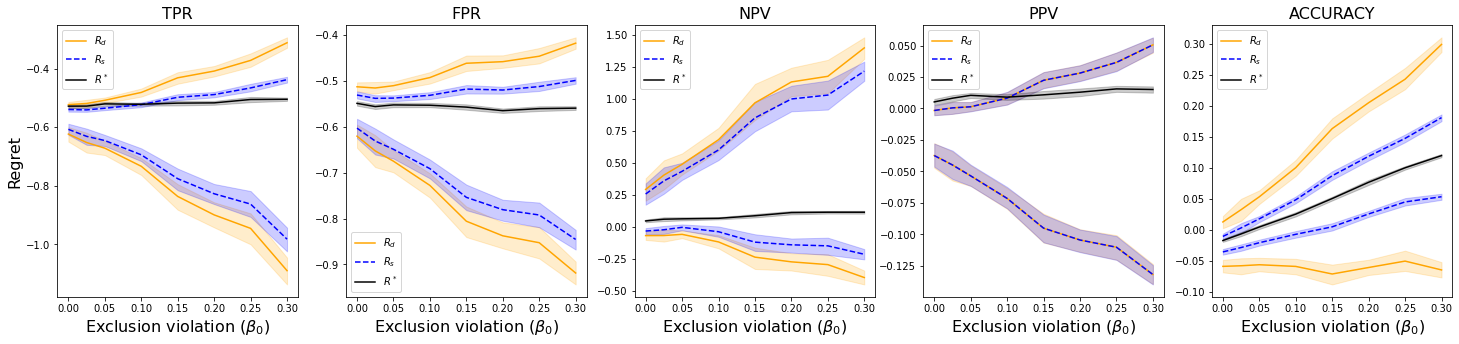

In [2]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)
Nsims = 10

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

dgp = set_dgp_config(dgp, 'IV')
beta_zy = [0, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
bedf = experiments.exclusion_sensitivity_experiment(dgp, beta_zy, n_sims=20, est_method='plugin', K=5)
plots.plot_exclusion_sensitivity(bedf)

# Experiment: Relevance violation tests

outcome regression error: 0.1253605328431208
propensitiy error: 0.08350098333915988
outcome regression error: 0.12685641311399531
propensitiy error: 0.08444855306993804
outcome regression error: 0.12523278496110196
propensitiy error: 0.08472968216644397
outcome regression error: 0.12979927803695976
propensitiy error: 0.08617334897186431
outcome regression error: 0.12909003499930902
propensitiy error: 0.08371092834042258
outcome regression error: 0.12457304033950797
propensitiy error: 0.0837307535824172
outcome regression error: 0.12977073330100222
propensitiy error: 0.08415940669819258
outcome regression error: 0.13212168275275865
propensitiy error: 0.08889522782686474
outcome regression error: 0.1322270374665685
propensitiy error: 0.08764719931139318
outcome regression error: 0.1326589032389531
propensitiy error: 0.08859454869875462
outcome regression error: 0.1276081398342916
propensitiy error: 0.08393397263327201
outcome regression error: 0.12620081504530925
propensitiy error: 0.085

outcome regression error: 0.13198118666930486
propensitiy error: 0.08357193565117797
outcome regression error: 0.1320576413297785
propensitiy error: 0.08280918333492862
outcome regression error: 0.12777566162275297
propensitiy error: 0.08104678454518156
outcome regression error: 0.12286686453719525
propensitiy error: 0.0802899156708618
outcome regression error: 0.13327203854390007
propensitiy error: 0.08314763486720562
outcome regression error: 0.12972149411857833
propensitiy error: 0.08274727006524632
outcome regression error: 0.1304774571883572
propensitiy error: 0.08548226815466367
outcome regression error: 0.13128529327582106
propensitiy error: 0.08430235944526472
outcome regression error: 0.13166391518369985
propensitiy error: 0.08817674934093837
outcome regression error: 0.12242046682758283
propensitiy error: 0.07995001186370164
outcome regression error: 0.1258731375165873
propensitiy error: 0.07971427175864416
outcome regression error: 0.1281158211662062
propensitiy error: 0.083

outcome regression error: 0.13437879194467525
propensitiy error: 0.08032943681903687
outcome regression error: 0.12452946525559616
propensitiy error: 0.07399406930942974
outcome regression error: 0.1303803025416168
propensitiy error: 0.07973769851402449
outcome regression error: 0.130310977934721
propensitiy error: 0.07937097647246849
outcome regression error: 0.1276067835045399
propensitiy error: 0.07774758274245792
outcome regression error: 0.12869265515064365
propensitiy error: 0.07860162441137786
outcome regression error: 0.13256963040186664
propensitiy error: 0.07777691599638958
outcome regression error: 0.13927936266103721
propensitiy error: 0.08360143380069199
outcome regression error: 0.13211486512061055
propensitiy error: 0.07939333564760699
outcome regression error: 0.13737557217101973
propensitiy error: 0.07859343080196202
outcome regression error: 0.13392005898761114
propensitiy error: 0.07881420824736662
outcome regression error: 0.13260683841031776
propensitiy error: 0.08

outcome regression error: 0.1306130574695944
propensitiy error: 0.07012533592935569
outcome regression error: 0.1257566699190732
propensitiy error: 0.06947264099048747
outcome regression error: 0.1289848742708616
propensitiy error: 0.07557060958421606
outcome regression error: 0.12907567381249255
propensitiy error: 0.07075127099171212
outcome regression error: 0.12561919858449538
propensitiy error: 0.06833957860533656
outcome regression error: 0.1325464261089171
propensitiy error: 0.07168025406921598
outcome regression error: 0.13361104297331633
propensitiy error: 0.06950688358333784
outcome regression error: 0.13401565007837707
propensitiy error: 0.06823654191462294
outcome regression error: 0.13740854541822375
propensitiy error: 0.06867349408319834
outcome regression error: 0.12559179624538663
propensitiy error: 0.06484899593495878
outcome regression error: 0.1253173749661528
propensitiy error: 0.0688805378619177
outcome regression error: 0.1309718907167013
propensitiy error: 0.07030

outcome regression error: 0.12636617520096924
propensitiy error: 0.05828305616999298
outcome regression error: 0.12907138736747914
propensitiy error: 0.0607184877259445
outcome regression error: 0.13404760574781438
propensitiy error: 0.06219324767401586
outcome regression error: 0.13219823016936644
propensitiy error: 0.06634985657746816
outcome regression error: 0.12621004559262244
propensitiy error: 0.05859676173486556
outcome regression error: 0.12936288333148016
propensitiy error: 0.06168742606518742
outcome regression error: 0.13452261204641366
propensitiy error: 0.06495278245556273
outcome regression error: 0.13104893242972923
propensitiy error: 0.059185465117923275
outcome regression error: 0.12401691309350746
propensitiy error: 0.05756819842075825
outcome regression error: 0.12538003686618668
propensitiy error: 0.05643872415149685
outcome regression error: 0.12477713248834736
propensitiy error: 0.057001049271033465
outcome regression error: 0.13199091259424028
propensitiy error:

outcome regression error: 0.1255075249269345
propensitiy error: 0.04946957450800329
outcome regression error: 0.13101427793904252
propensitiy error: 0.05247530607165453
outcome regression error: 0.12767633401385228
propensitiy error: 0.050894014222432206
outcome regression error: 0.12666723322022572
propensitiy error: 0.055198178127560296
outcome regression error: 0.12894028201398752
propensitiy error: 0.053071458292629464
outcome regression error: 0.12596176263334585
propensitiy error: 0.053082422724909345
outcome regression error: 0.1339573333139335
propensitiy error: 0.05640649405545804
outcome regression error: 0.12843039119794702
propensitiy error: 0.05546601013661918
outcome regression error: 0.12910334343557123
propensitiy error: 0.05224161055870909
outcome regression error: 0.12730436112198074
propensitiy error: 0.05244837138234021
outcome regression error: 0.12878297964770455
propensitiy error: 0.05256576808938226
outcome regression error: 0.1255757696318615
propensitiy error:

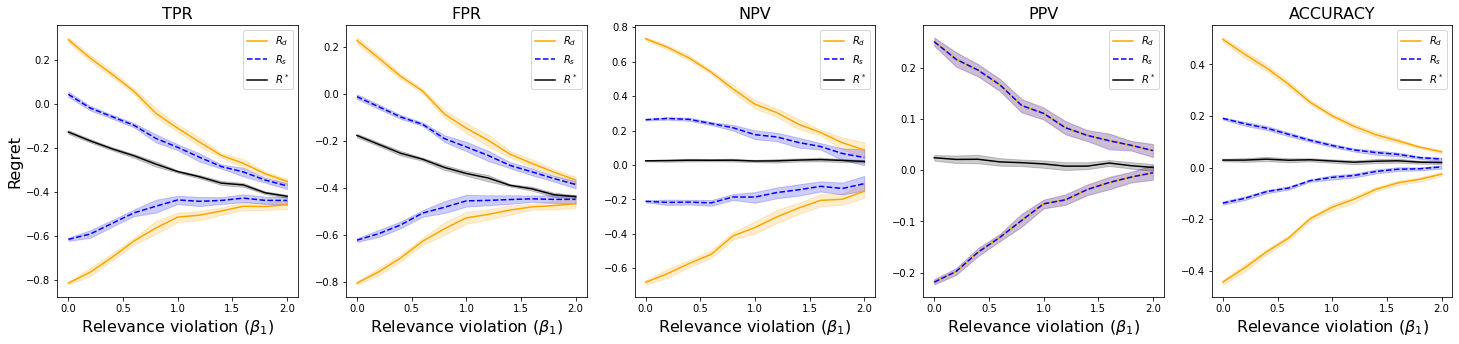

In [6]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 5000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV'
}

iv_dgp = set_dgp_config(dgp, 'IV')
beta_zd = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
brdf = experiments.relevance_sensitivity_experiment(iv_dgp, beta_zd, n_sims=10)
plots.plot_relevance_sensitivity(brdf)


## Robustness check: MSM $\Lambda$ coverage

In [5]:
lambda_star = 1.1
lambdas = np.arange(1, 2.6, .1)
Nsims = 10

Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.2,
    'id_assumption': 'MSM'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
lambda_star = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]

msm_bounds = []

for ls in lambda_star:
    
    msm_dgp['lambda_star'] = ls
    
    for sim in range(Nsims):
        
        data = generate_data(msm_dgp)
        bounds = estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='oracle', K=5)
        bounds['ls'] = ls
        msm_bounds.append(bounds)

msmdf = pd.concat(msm_bounds)


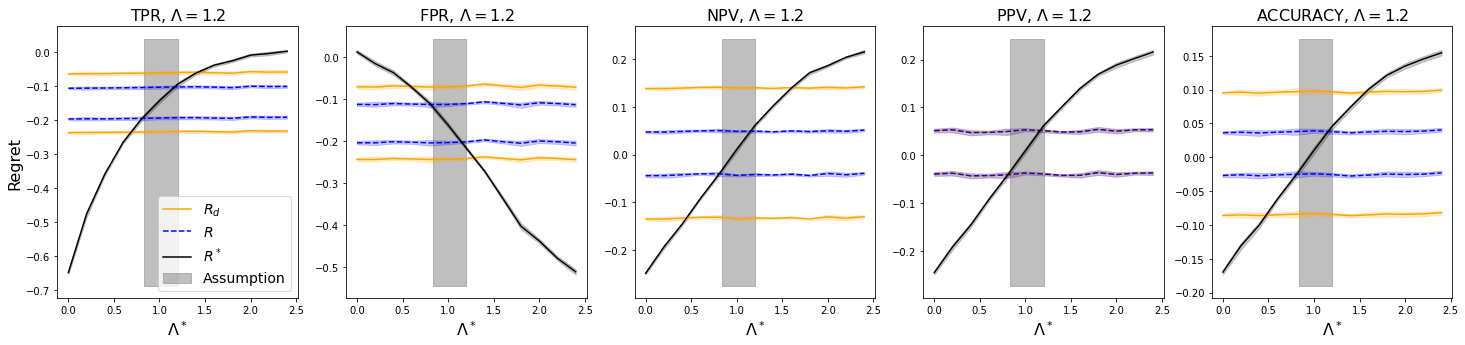

In [6]:


lam = msm_dgp['lambda']

metrics = msmdf['metric'].unique().tolist()

fig, axes = plt.subplots(1, 5, figsize=(25, 5)) # Adjust the figsize as needed

for i, metric in enumerate(metrics):
    
    # Filter the DataFrame for the current metric
    metric_df = msmdf[msmdf['metric'] == metric]
    
    # Reset the index to avoid the duplicate labels error
    metric_df = metric_df.reset_index(drop=True)
    ymin = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].min().min()
    ymax = metric_df[['Rs_down', 'Rs_up', 'Rd_down', 'Rd_up', 'R_oracle']].max().max()
    
    # Create each lineplot on the corresponding subplot axis
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_up', color='orange', linestyle='-', label='$R_d$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rs_down', color='orange', linestyle='-')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_up', color='blue', linestyle='--', label='$R$')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='Rd_down', color='blue', linestyle='--')
    sns.lineplot(ax=axes[i], data=metric_df, x='ls', y='R_oracle', color='black', label='$R^*$')

    # Set the titles, labels, etc.
    axes[i].set_xlabel(r'$\Lambda^*$', fontsize=16)
    axes[i].set_title(f'{utils.metric_dict[metric]}, $\Lambda={lam}$', fontsize=16)
    axes[i].set_ylabel(f'', fontsize=16)
    
    ymin, ymax = axes[i].get_ylim()
    axes[i].fill_between([lam**-1, lam], ymin, ymax, color='grey',
                         alpha=0.5, zorder=-1, label='Assumption')
    axes[i].legend().set_visible(False)
    

    
axes[0].set_ylabel(f'Regret', fontsize=16)
axes[0].legend(fontsize=14)